# Lending Club Case Study

#### Introduction
The company Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

#### Key Objective
Finding the driving forces, or driver variables, behind loan defaults, which are reliable predictors of future defaults, is the study's main goal. The business will be able to manage its portfolio and evaluate risk properly thanks to this insight.

#### Approach
The study uses a systematic strategy to determine the factors that affect loan default, which involves data validation and wrangling, and data visualisation. The report offers suggestions for the business to better evaluate and manage risks in its loan portfolio based on these findings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lend = pd.read_csv("loan.csv",header=0)

C:\Users\ABC\AppData\Local\Temp\ipykernel_18900\301097881.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  lend = pd.read_csv("loan.csv",header=0)


In [3]:
lend.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Information about Dataset

In [4]:
lend.shape

(39717, 111)

In [5]:
lend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
lend.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
lend.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## Data Validation and Preparation

In [8]:
lend.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
lend=lend.dropna(axis=1,how='all')

In [10]:
null_perc=lend.isna().sum()/len(lend.index)*100

In [11]:
null_perc[null_perc>30]

desc                      32.580507
mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
next_pymnt_d              97.129693
dtype: float64

In [12]:
lend=lend.drop(null_perc[null_perc>30].index,axis=1)

In [13]:
lend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
lend.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [15]:
lend=lend.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan','member_id','url','title','emp_title','zip_code'],axis=1)

In [16]:
lend.shape

(39717, 39)

In [17]:
lend.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [18]:
lend.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [19]:
purpose_perc=(lend.purpose.value_counts()/len(lend))*100
purpose_perc

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

In [20]:
lend.isnull().sum().sort_values(ascending=False)

emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
last_credit_pull_d            2
total_pymnt                   0
pub_rec                       0
revol_bal                     0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_rec_prncp               0
total_pymnt_inv               0
inq_last_6mths                0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
open_acc                      0
id                            0
loan_amnt                     0
delinq_2yrs                   0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_i

In [21]:
lend.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [22]:
lend.emp_length.fillna('< 1 year',inplace=True)

In [23]:
lend.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [24]:
lend.pub_rec_bankruptcies.fillna('Unknown',inplace=True)

In [25]:
lend.revol_util.unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [26]:
lend.revol_util.fillna('0.00%',inplace=True)

In [27]:
lend.revol_util.isnull().sum()

0

### Adding derived columns

In [28]:
#Correcting the data types and adding columns
lend['pub_rec_bankruptcies_derv']=lend.pub_rec_bankruptcies
lend['pub_rec_bankruptcies_derv'].replace('Unknown', '0.0',inplace=True)
lend.pub_rec_bankruptcies_derv=lend.pub_rec_bankruptcies_derv.apply(pd.to_numeric)

In [29]:
lend['int_rate_derv']=lend.int_rate.str.rstrip('%')
lend.int_rate_derv=lend.int_rate_derv.apply(pd.to_numeric)

In [30]:
lend['emp_length_derv']=lend.emp_length.str.extract('(\d+)')
lend.emp_length_derv=lend.emp_length_derv.apply(pd.to_numeric)

In [31]:
lend['issue_d']=pd.to_datetime(lend.issue_d.str.upper(), format='%b-%y', yearfirst=False)
lend['issue_d_yr']=lend.issue_d.dt.year
lend['issue_d_mth']=lend.issue_d.dt.strftime('%b')

In [32]:
lend['earliest_cr_line']=pd.to_datetime(lend.earliest_cr_line.str.upper(), format='%b-%y', yearfirst=False)
lend['earliest_cr_line_yr']=lend.earliest_cr_line.dt.year
lend['earliest_cr_line_mth']=lend.earliest_cr_line.dt.strftime('%b')

In [33]:
#Defining category columns to category data type
lend.loan_status=lend.loan_status.astype('category')
lend.purpose=lend.purpose.astype('category')
lend.addr_state=lend.addr_state.astype('category')
lend.home_ownership=lend.home_ownership.astype('category')
lend.verification_status=lend.verification_status.astype('category')
lend.grade=lend.grade.astype('category')

In [34]:
#Creating Annual Income categorical data
cut_bins = [0, 5000, 10000, 20000, 30000, 50000, 75000, 100000, 200000, 300000, 500000, 800000, 1000000, 1500000, 2000000]
cut_labels = ['0 - 5000', '5000 - 10000', '10000 - 20000', '20000 - 30000', '30000 - 50000', '50000 - 75000', '75000 - 100000', '100000 - 200000', '200000 - 300000', '300000 - 500000', '500000 - 800000', '800000 - 1000000', '1000000 - 1500000', ' > 1500000']
lend['annual_inc_div'] = pd.cut(x=lend['annual_inc'], bins = cut_bins, labels = cut_labels)

In [35]:
#Creating Interest Rate categorical data
lend['int_rate_derv2'] = pd.cut(lend['int_rate_derv'], bins=5, precision=0, labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

In [36]:
#Creating Loan Amount categorical data
lend['funded_amnt_inv_div'] = pd.cut(lend['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
lend['funded_amnt_div'] = pd.cut(lend['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
lend['loan_amnt_div'] = pd.cut(lend['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

In [37]:
lend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         39717 non-null  int64         
 1   loan_amnt                  39717 non-null  int64         
 2   funded_amnt                39717 non-null  int64         
 3   funded_amnt_inv            39717 non-null  float64       
 4   term                       39717 non-null  object        
 5   int_rate                   39717 non-null  object        
 6   installment                39717 non-null  float64       
 7   grade                      39717 non-null  category      
 8   sub_grade                  39717 non-null  object        
 9   emp_length                 39717 non-null  object        
 10  home_ownership             39717 non-null  category      
 11  annual_inc                 39717 non-null  float64       
 12  veri

<AxesSubplot: >

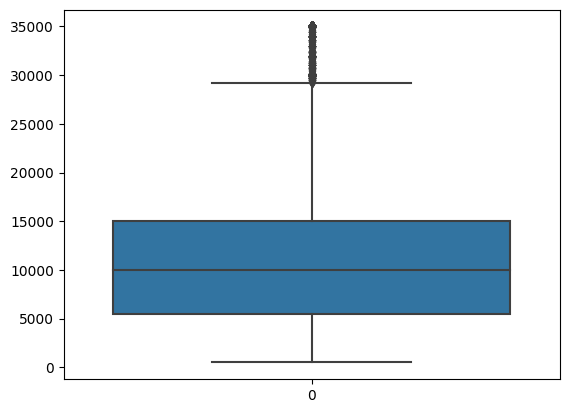

In [38]:
#Outliers for loan_amnt column
sns.boxplot(lend['loan_amnt'])

In [39]:
# Checking percentiles for loan_amnt
lend.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    22000.0
0.950    25000.0
0.970    30000.0
0.975    30000.0
0.980    31468.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

#### Observation

Data is continous, hence taking no action

In [40]:
#Creating Dataframe for Charged Off loans only
Charged_off_df=lend[lend.loan_status=='Charged Off']
Charged_off_df.shape

(5627, 51)

## Univariate Analysis

<AxesSubplot: xlabel='loan_status', ylabel='count'>

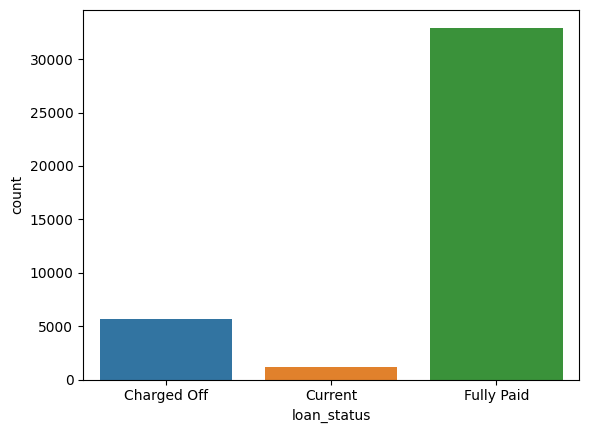

In [41]:
#Loan status
sns.countplot(lend,x='loan_status')

#### Observation

Fully Paid loans are high when compared to Charged Off loans

In [42]:
#Loan status by Loan grade
lend['loan_status'] = lend['loan_status'].apply(lambda x: 'Default' if x=='Charged Off' else 'Not Default')

In [43]:
ctab = pd.crosstab(lend['grade'], lend['loan_status'], normalize='index')

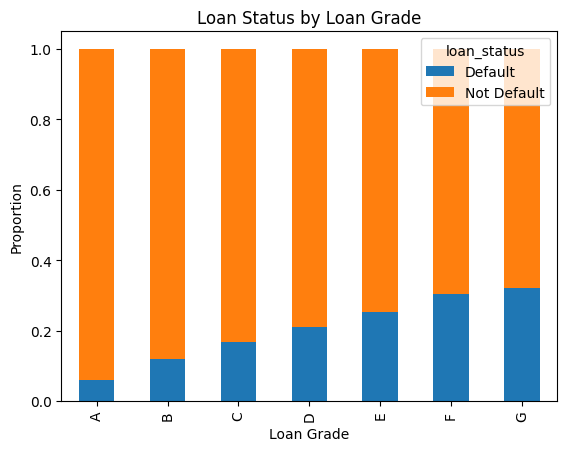

In [44]:
ctab.plot(kind='bar', stacked=True)
plt.xlabel('Loan Grade')
plt.ylabel('Proportion')
plt.title('Loan Status by Loan Grade')
plt.show()

#### Observation
Loan status indicates loan outcome and default risk, essential for identifying patterns, builending models, and assessing portfolio performance. This chart shows the proportion of loans in each grade that are either defaulted or not defaulted and helps us understand how loan grade and loan status are related.Loans with lower grades have higher default rates, and loans with higher grades are more likely to be fully paid off.

C:\Users\ABC\AppData\Local\Temp\ipykernel_18900\747580956.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=lend.loan_amnt, rug=True)


<AxesSubplot: xlabel='loan_amnt', ylabel='Density'>

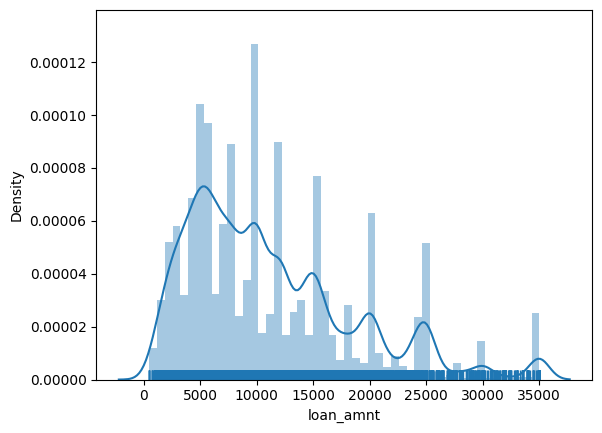

In [45]:
#Loan Amount analysis
sns.distplot(a=lend.loan_amnt, rug=True)

<AxesSubplot: xlabel='loan_amnt_div', ylabel='count'>

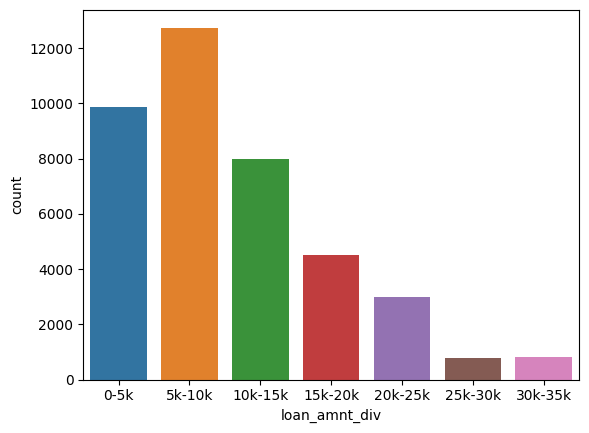

In [46]:
sns.countplot(x='loan_amnt_div', data=lend)

Text(0.5, 1.0, 'Charged Off Loan Amount Analysis')

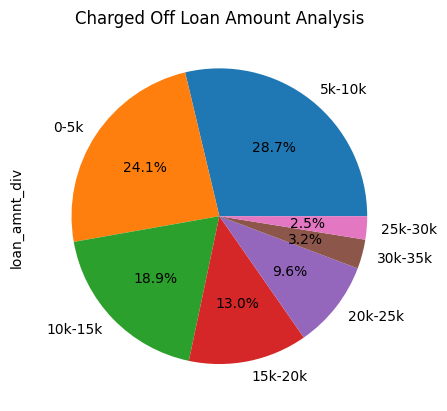

In [47]:
Charged_off_df['loan_amnt_div'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Charged Off Loan Amount Analysis')

In [48]:
lend.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### Observation

Loan amount varies between 500 to 35k, with average of 11219
Majority of loan is provide for amount between 5k-10k
Charged off loan count is higher for loan amount between 5k-10k

C:\Users\ABC\AppData\Local\Temp\ipykernel_18900\2432762219.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=lend.int_rate_derv, rug=True)


Text(0.5, 1.0, 'Overall Interest Analysis')

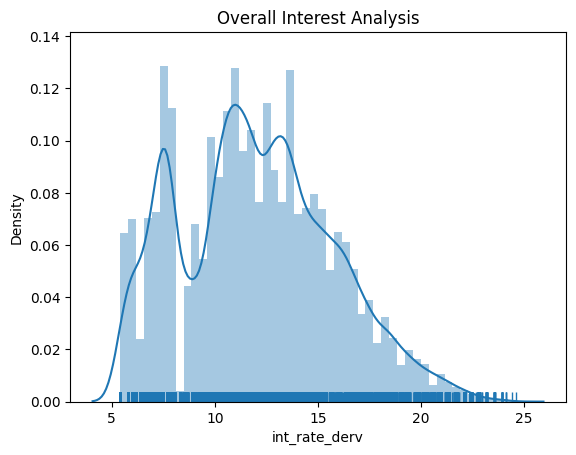

In [49]:
#int_rate Analysis
sns.distplot(a=lend.int_rate_derv, rug=True)
plt.title('Overall Interest Analysis')

Text(0.5, 1.0, 'Charged Off - Interest Rate Analysis')

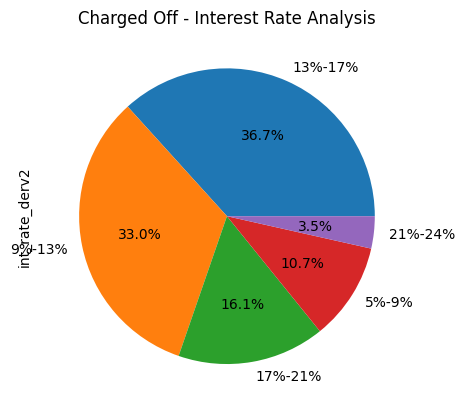

In [50]:
Charged_off_df['int_rate_derv2'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Charged Off - Interest Rate Analysis')

#### Observation
Overall Loan Data indicates the interest rate peaking at 10%
Around 50% of Charged Off Loans are in 13% - 21% interest rate range.

<AxesSubplot: xlabel='count', ylabel='purpose'>

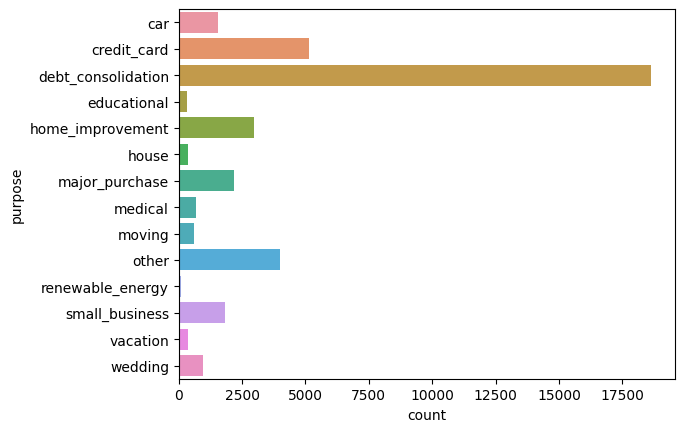

In [51]:
#Purpose of loan analysis
sns.countplot(y=lend.purpose)

<AxesSubplot: xlabel='count', ylabel='purpose'>

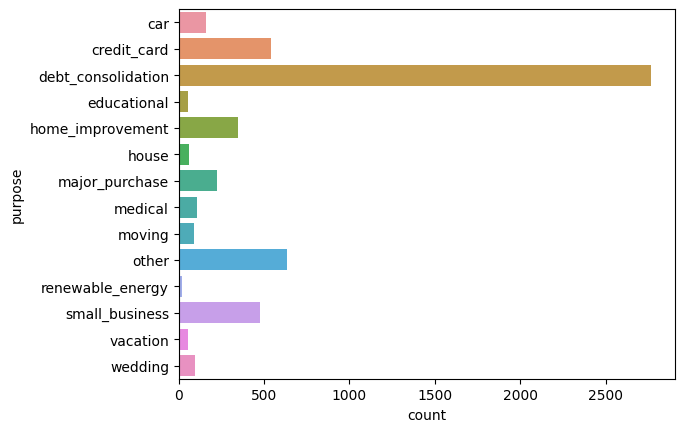

In [52]:
#Charged off loans
sns.countplot(y=Charged_off_df.purpose)

#### Observation
Loans taken for Debt Consolidation purpose are major defaulters, followed for Credit Card & Other purpose. This is similar for Charged Off Loans too.

In [53]:
#Loan grade by purpose
ctab = pd.crosstab(lend['purpose'], lend['grade'], normalize='index')

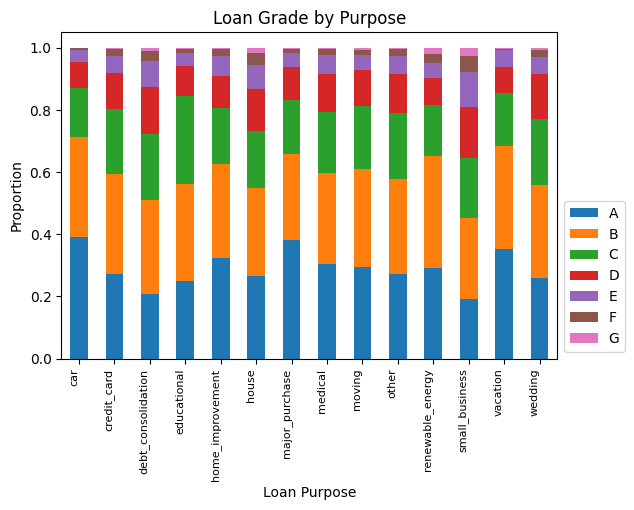

In [54]:
ax = ctab.plot(kind='bar', stacked=True)
ax.set_xlabel('Loan Purpose')
ax.set_ylabel('Proportion')
ax.set_title('Loan Grade by Purpose')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=8)
plt.subplots_adjust(bottom=0.2)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0), ncol=1)
plt.show()

#### The stacked bar chart shows the proportion of loans in each loan grade for each loan purpose, which helps us understand how loan purpose and loan grade are related. We can draw several conclusions from this chart:**
- Debt consolidation is the most common loan purpose across all loan grades, while educational loans are the least common.
- The proportion of loans for debt consolidation is highest in the A and B loan grades, while the proportion of loans for small   business and renewable energy is highest in the C and D loan grades.
- The proportion of loans for credit card refinancing is highest in the E and F loan grades, while the proportion of loans for     home improvement is highest in the G loan grade.
- The highest proportion of defaulted loans is in the D and E loan grades, with the highest default rates for small business and   renewable energy loans.

#### Based on these observations, we can make several recommendations to manage credit risk and reduce default rates:**
- Lending companies shoulend carefully assess the creditworthiness of borrowers before approving loans, particularly for higher-     risk loan purposes such as small business and renewable energy.
- Companies can adjust their lending policies and interest rates based on the risk associated with different loan purposes and     grades to better manage credit risk and reduce default rates.
- Lending companies shoulend also monitor loan purpose data over time to identify trends and changes in customer demand and adjust   their offerings accordingly.

## Segmented Univariate Analysis

<AxesSubplot: xlabel='count', ylabel='term'>

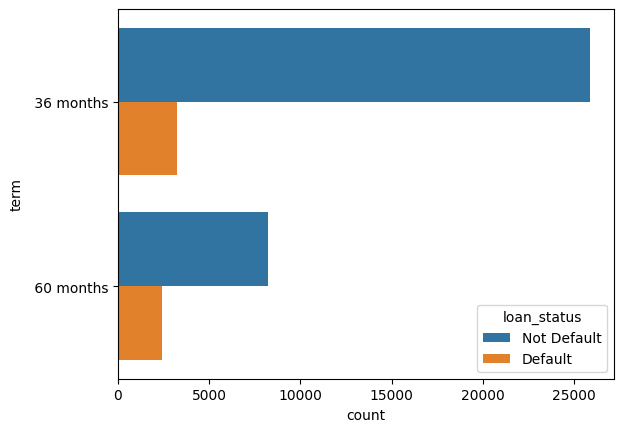

In [55]:
# Loan term vs Loan status
sns.countplot(data=lend,y='term', hue='loan_status')

#### Observation
36 months term has higher number of defaulters

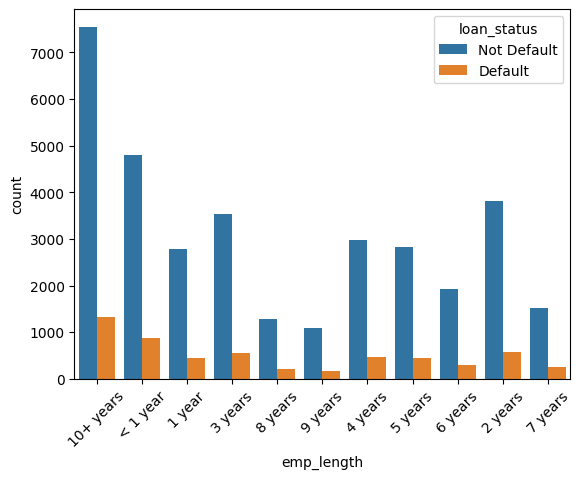

In [56]:
#Employment length vs loan status
sns.countplot(data=lend, x='emp_length', hue='loan_status')
plt.xticks(rotation=45)
plt.show()

#### Observation

Employees with 10+ years of exp are more likely to default

## Bivariate Analysis

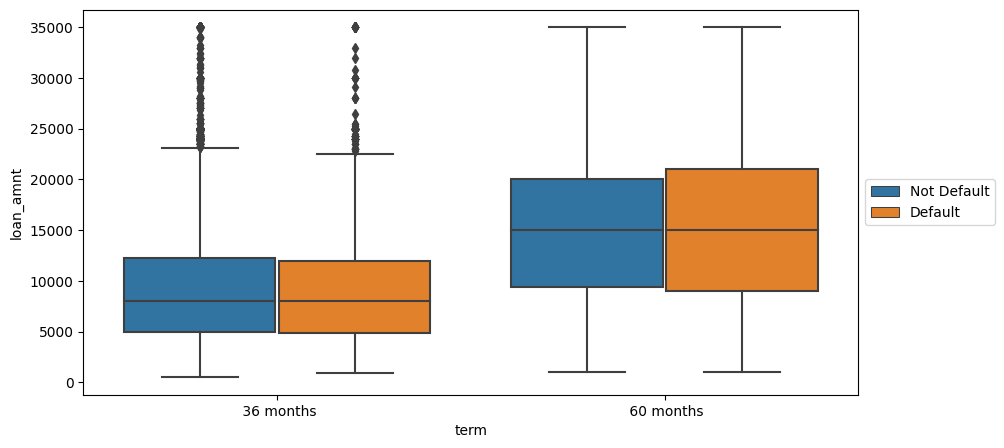

In [57]:
#Loan amount and loan term vs Loan status
plt.figure(figsize=(10,5))
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=lend)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Observation

Loan Amounts and Loan defaulters are higher for 60 months term

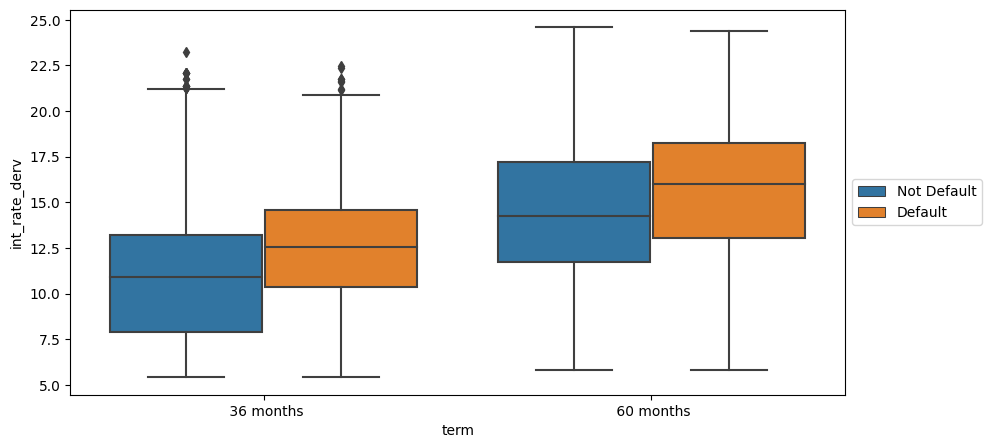

In [58]:
#term vs interest rate vs Loan status
plt.figure(figsize=(10,5))
sns.boxplot(x='term', y='int_rate_derv', hue='loan_status', data=lend)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

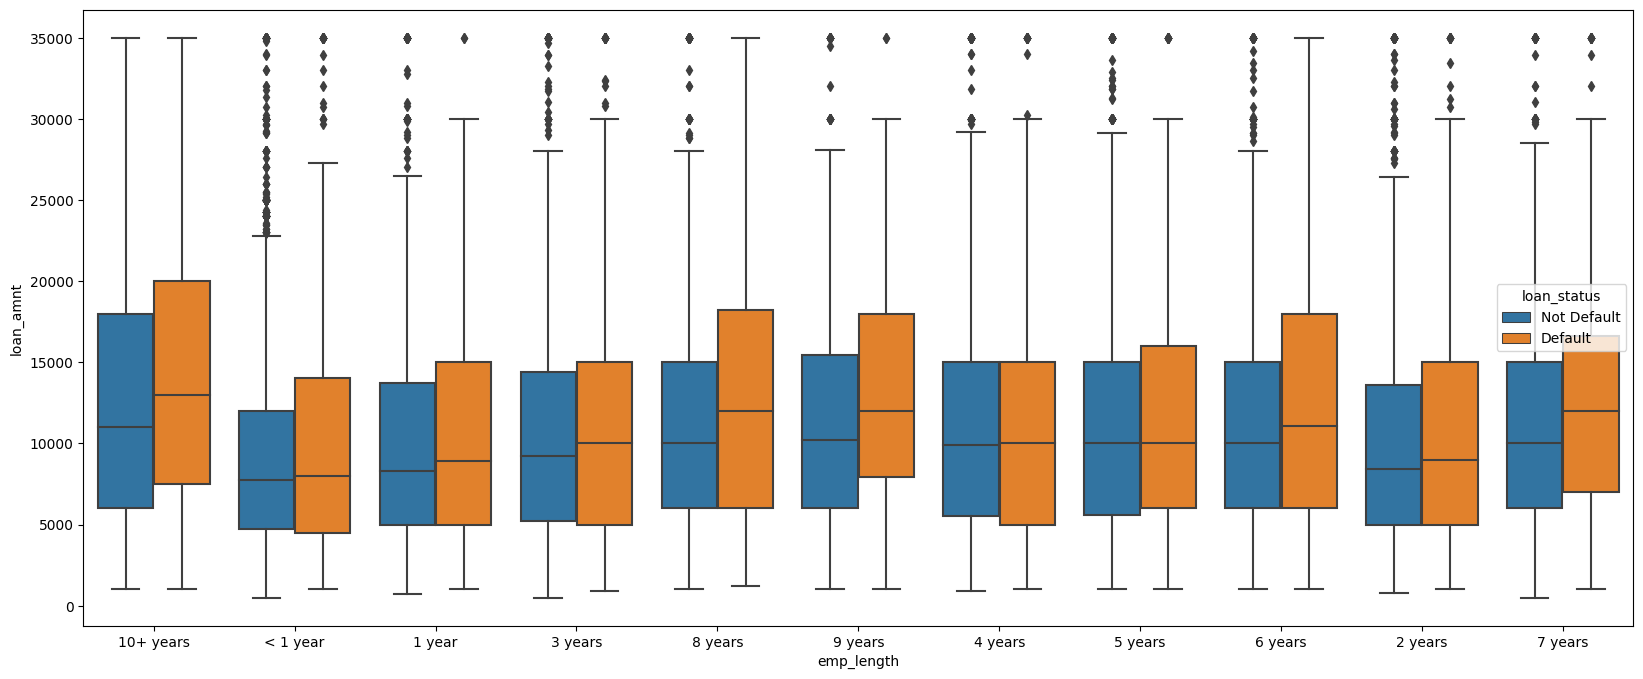

In [59]:
#employment length vs loan amount vs loan status
plt.figure(figsize=(20,8))
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=lend)
plt.show()

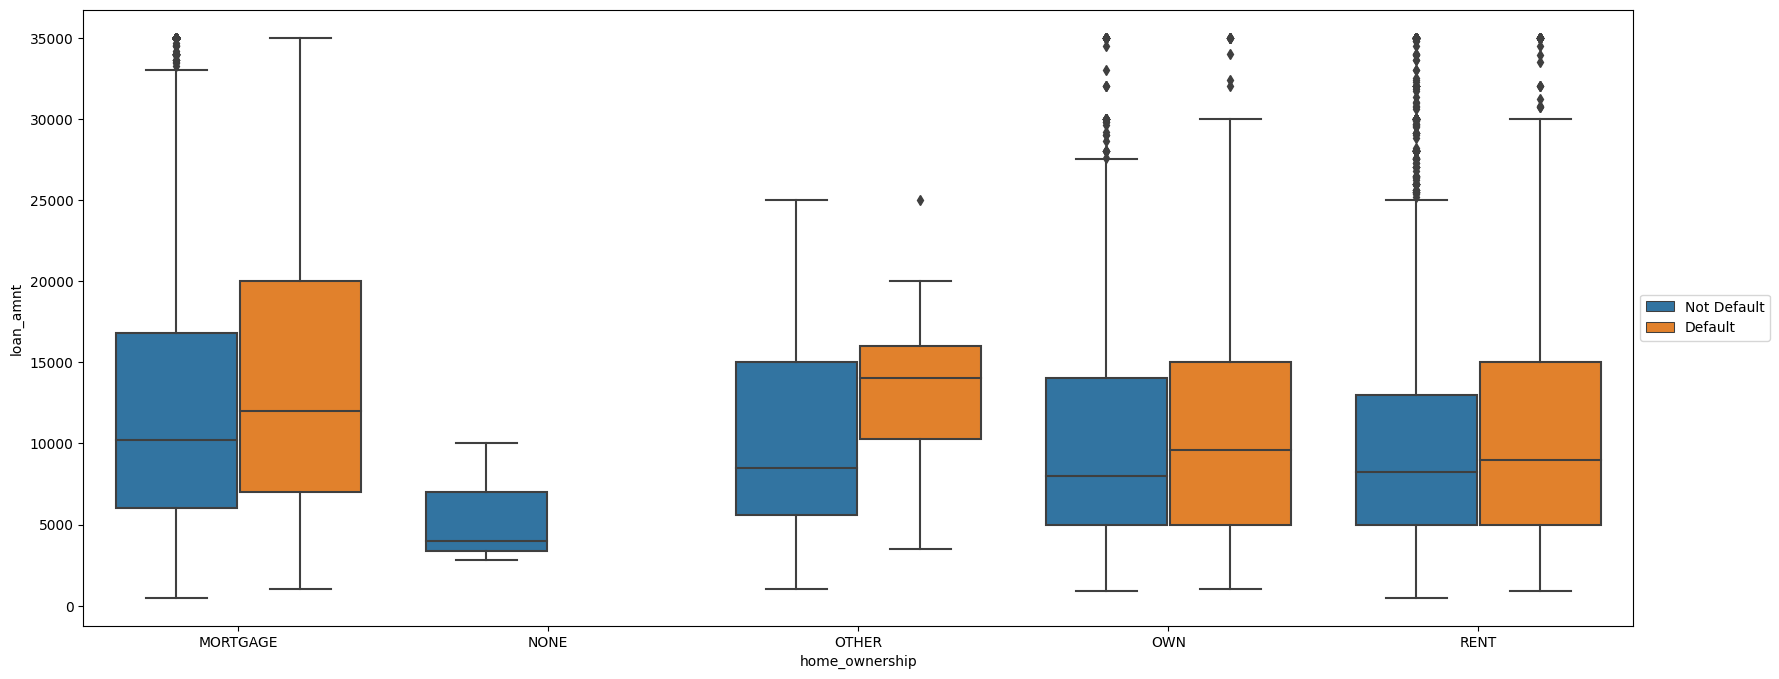

In [60]:
#Home ownership vs loan amount vs loan status
plt.figure(figsize=(20,8))
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=lend)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Observation

Loan applicants with mortgage have higher loan amount and are more likely to default

## Correlation Analysis

<AxesSubplot: >

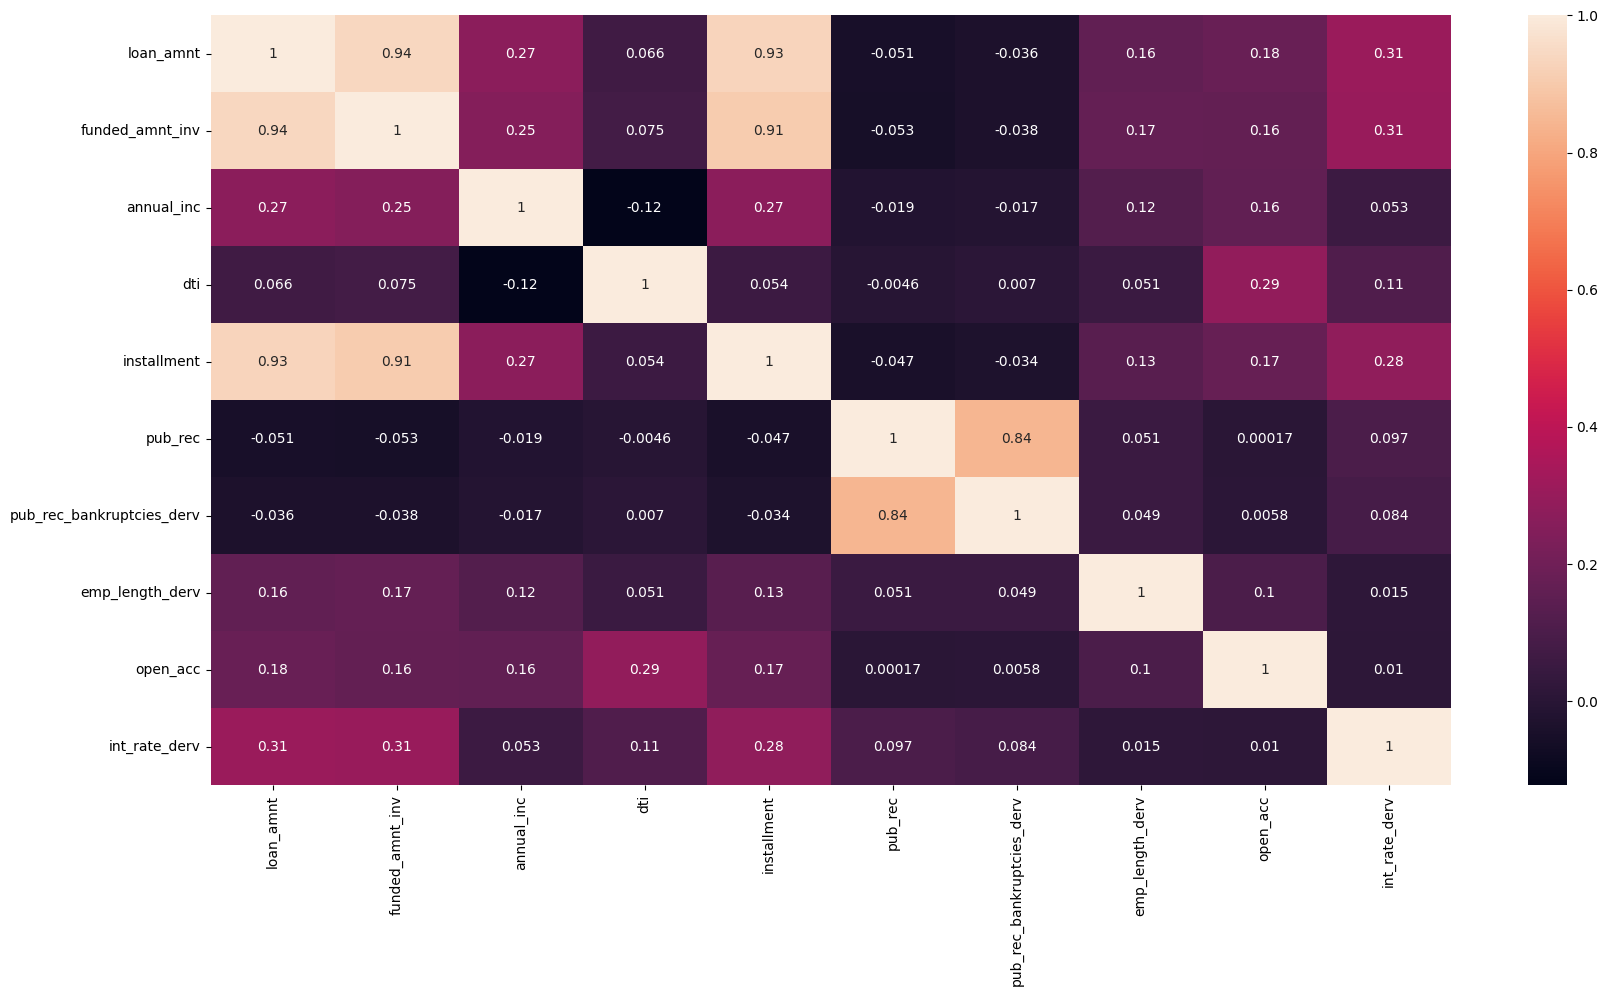

In [61]:
plt.figure(figsize=(20,10))
corr_df = lend[['loan_amnt','funded_amnt_inv','annual_inc', 'dti', 'installment','pub_rec','pub_rec_bankruptcies_derv', 'emp_length_derv','open_acc','int_rate_derv']]
sns.heatmap(corr_df.corr(), annot=True)

#### Observation

- Positive correlation between loan_amnt, funded_amnt_inv and installment
- Negative correlation is between annual_inc and dti

## Observation Summary:

#### Univariate Analysis
- More than 70% of the loans are sanctioned for the term of 60 Months
- Loan Amount varies from 500 to 35K and approx.. 80% of the loans are sanctioned for loan amount in range of 500 to 15K
- 73% of loans defaulted are in the loan amount range of 500 to 15K.
- Around 50% of Charged Off Loans are in 13% to 21% interest rate range.
- Loans taken for Debt Consolidation purpose are major defaulters, followed for Credit Card & Other purpose. This is similar for Charged Off Loans too.

#### Segmented Univariate Analysis
- 36 months term has higher number of defaulters
- Employees with 10+ years of exp are more likely to default

#### Bivariate Analysis
- Interest Rate for Charged Off Loans is higher than the Fully Paid loans for both 36 months and 60 months term. Indicates that loans with higher interest rate are more likely to be defaulted.
- Loan applicants with mortgage have high loan amount
- Loan applicants with mortgage have high defaulters

#### Correlation Analysis
The heatmap shows the correlation between various loan factors such as loan amount, annual income, interest rate, and loan status. It suggests that loan amount, installment, and annual income have a positive correlation, while interest rate and DTI have a negative correlation with loan status. This can help in identifying factors that affect loan approval and in making lending decisions.

#### Recommendations
##### The Probability of defaulting is high when:
- Loan Applicants not owing home (Mortgage or Rent) and have high Annual Income Range (60K - 70K)
- Loans with interest rates between 9% - 17%
- Applicants with Annual Income range between 35k - 70k and availing loan for Debt Consolidation.
- Loan Applicants with >10 years of experience and with loan amount > 10K or with interest rate (>10%)

##### Indecators for loan defaulters
- Annual Income, Home Ownership, Purpose of Loan, Loan Amount, Interest Rate